# **Image Enhancement Based Medical Image Analysis**

Shaikh Mahmudul Islam

Himadri Shekhar Mondal

2019 10th International Conference on Computing, Communication and Networking Technologies (ICCCNT)





Image enhancement is a vital step of medical image
analysis and image recognition. X-ray and ultrasound imaging
are the most preferred medical imaging technologies which are
important for diagnosis of disease. But the edges and borders on
image are not as clear as expected due to interference and low
intensity in images. This paper presents an images enhancement
techniques, specially in the case of medical images. 

Using image
enhancement, it is possible to get the details which are kept
hidden as well as to improve the image contrast. In the case
of analyzing image, the commencing part is that the edge of
an image. Successful results of image analysis depend on edge
detection & enhancement. This paper develops
a method of enhancement by incorporating Laplacian, Sobel
operator, addition operation, filter, product operation and power
law transformation techniques to enhance medical images. This
developed method is tested on low contrast medical images and
by observing the results it can be said that this applied methods
perform well for enhancing medical images.

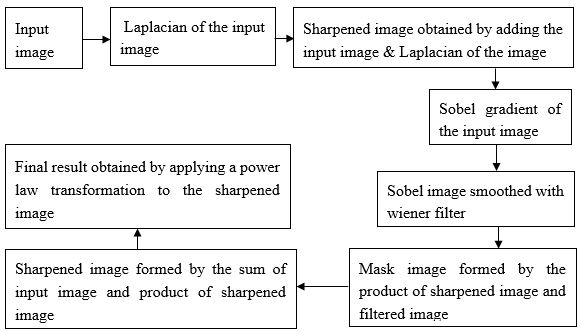

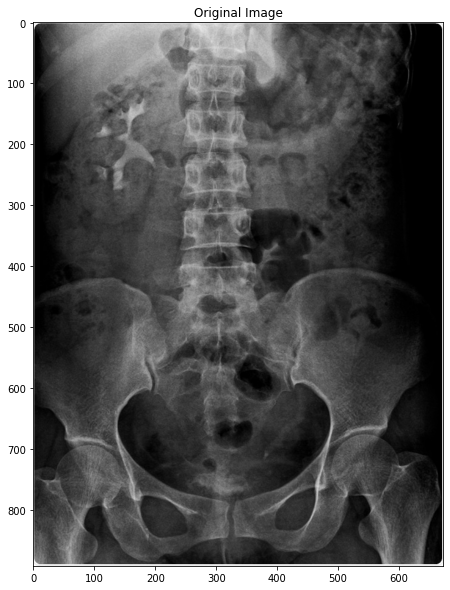

In [ ]:
#IMPORING THE IMAGE
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image_ori = cv2.imread("/content/pelvic.jpg",0)
plt.figure (figsize=(10,10))
plt.title ("Original Image")
plt.imshow (image_ori, cmap='gray')
sh = image_ori.shape

i) Firstly, the Laplacian Filter is applied on the input image to
highlight the details. It also highlights edges and other discontinuities.

True

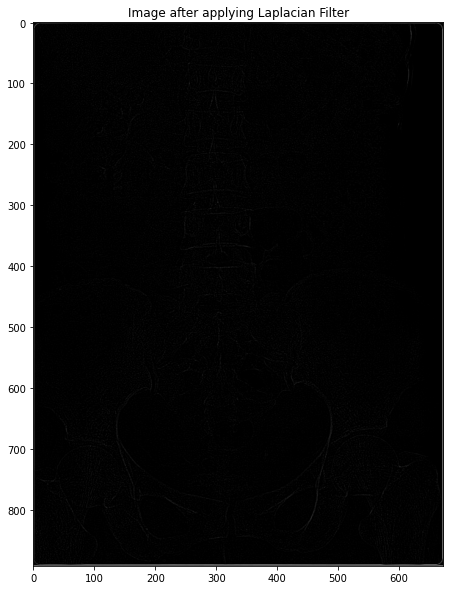

In [ ]:
#LAPLACIAN OF THE INPUT IMAGE

from scipy import signal
import cv2

mask_laplacian =[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
laplacian_img = signal.convolve2d(image_ori,mask_laplacian,mode='same')

for r in range (0,sh[0]):
    for c in range (0,sh[1]):
        if laplacian_img [r][c] < 0:
            laplacian_img [r][c]= 0

plt.figure (figsize=(10,10))
plt.imshow(laplacian_img, cmap='gray')
plt.title ("Image after applying Laplacian Filter")
cv2.imwrite ('/content/result/laplacian_image.jpg',laplacian_img)

ii) Next we get sharpened image by adding the original
image and the output image of the Laplacian image completed
in step 1.

True

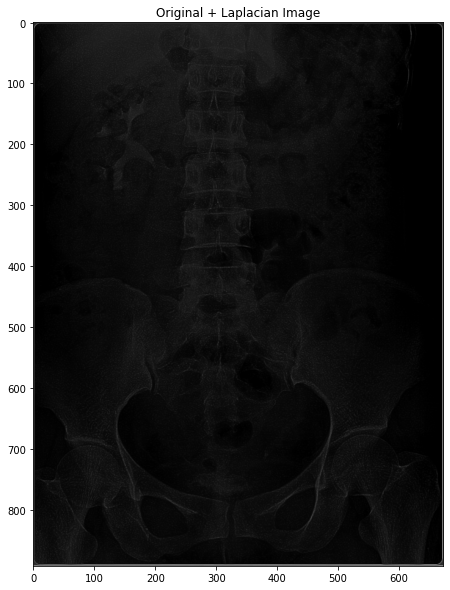

In [ ]:
#SHARPENED IMAGE
img_sharp = image_ori + laplacian_img
plt.figure (figsize=(10,10))
plt.imshow (img_sharp, cmap='gray')
plt.title ("Original + Laplacian Image")
cv2.imwrite ('/content/result/img_sharp.png', img_sharp)

iii) Then Sobel operator is used on the original image to
enhance the prominent edges. The edges of the output images
are much more dominant in the image than in the Laplacian
image.

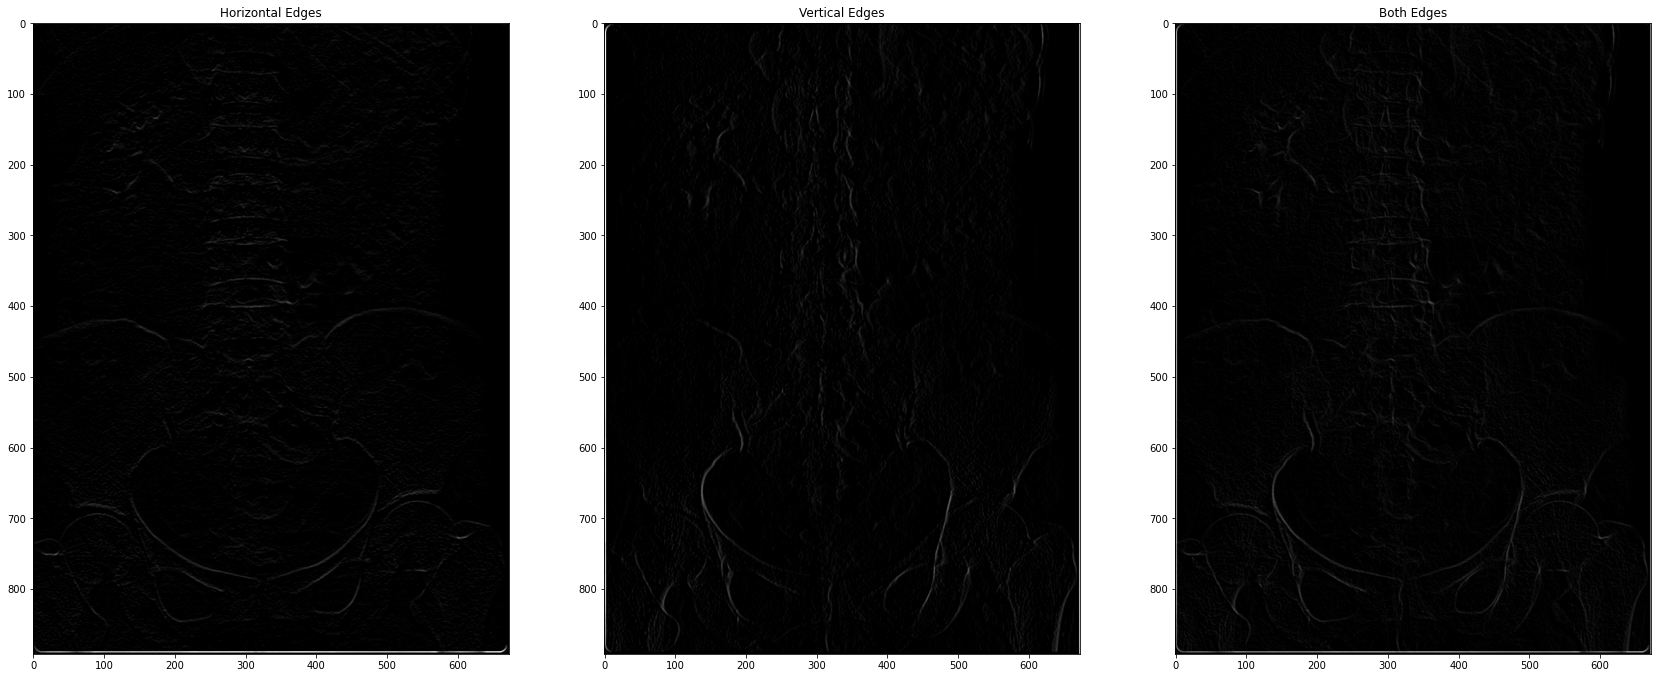

In [ ]:
#EDGE DETECTION
horz =[[1,2,1],[0,0,0],[-1,-2,-1]]
horz_img = signal.convolve2d(image_ori,horz,mode='same')
for r in range (0,sh[0]):
    for c in range (0,sh[1]):
        if horz_img [r][c] < 0:
            horz_img [r][c]= 0

vert =[[-1,0,1],[-2,0,2],[-1,0,1]]
vert_img = signal.convolve2d(image_ori,vert,mode='same')
for r in range (0,sh[0]):
    for c in range (0,sh[1]):
        if vert_img [r][c] < 0:
            vert_img [r][c]= 0

plt.figure (figsize=(29,29))
plt.subplot(1,3,1)
plt.imshow (horz_img, cmap='gray')
plt.title ("Horizontal Edges")
plt.subplot(1,3,2)
plt.imshow (vert_img, cmap='gray')
plt.title ("Vertical Edges")
plt.subplot(1,3,3)
plt.imshow (vert_img + horz_img, cmap='gray')
plt.title ("Both Edges")

edge_final = vert_img + horz_img


iv) The smoothed gradient image is obtained by the averaging
filter. These images are much brighter than the output image
of the Laplacian.

In [ ]:
import numpy as np

size = 3
avg_filter = np.ones((size,size))/(size*size)
print (avg_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


True

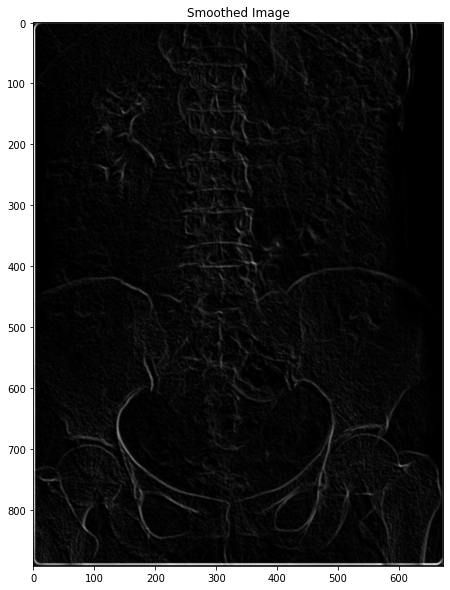

In [ ]:
smooth_img = signal.convolve2d (edge_final,avg_filter, mode='same')
plt.figure (figsize=(10,10))
plt.imshow (smooth_img,cmap='gray')
plt.title ("Smoothed Image")
cv2.imwrite ('/content/result/smooth_img.png', smooth_img)

v) After that the product of the sharpened image &
smoothed filtered image is taken.

True

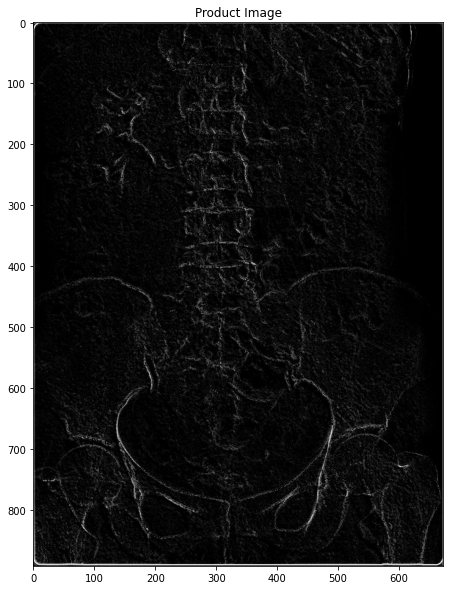

In [ ]:
smooth_img = cv2.imread ('/content/result/smooth_img.png')
img_sharp = cv2.imread ('/content/result/img_sharp.png')

product_img = cv2.bitwise_and (smooth_img, img_sharp, mask= None )
plt.figure (figsize=(10,10))
plt.imshow (product_img,cmap = 'gray')
plt.title ("Product Image")
cv2.imwrite ('/content/result/product_img.png', product_img)

vi) Again by adding the product image to the resulted
sharpened image is performed for more enhanced analysis

True

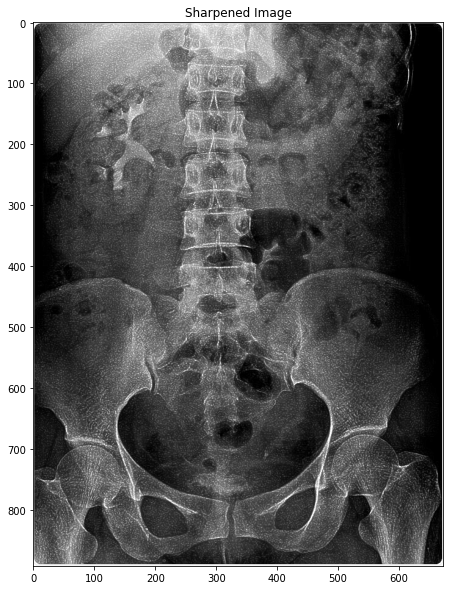

In [ ]:
img_sharp = cv2.imread ('/content/result/img_sharp.png')
product_img = cv2.imread ('/content/result/product_img.png')

sharper_img = cv2.bitwise_or(img_sharp, product_img, mask=None)
plt.figure (figsize=(10,10))
plt.imshow (sharper_img,cmap='gray')
plt.title ("Sharpened Image")
cv2.imwrite ('/content/result/sharper_img.png', sharper_img)

viii) The last step in this research is to increase the dynamic
range [contrast] of the sharpened image. Power law transformation is
a good solution for this problem. As a result Power law
transformation is applied.

Text(0.5, 1.0, 'Gamma = 0.9')

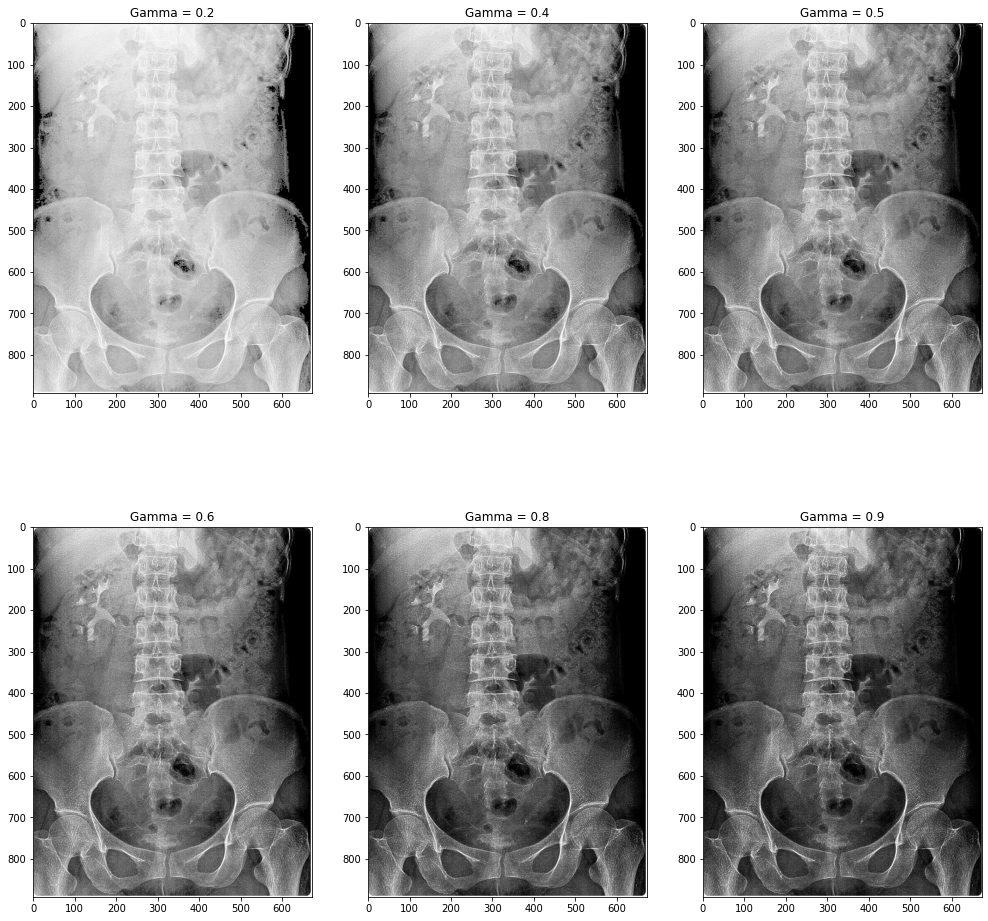

In [ ]:
powers = [0.2,0.4,0.5,0.6,0.8,0.9]
output = []
for i in powers:
  power_law = np.array(255*(sharper_img/255) ** i, dtype = 'uint8')
  output.append (power_law)

plt.figure (figsize=(17,17))
plt.subplot (2,3,1)
plt.imshow (output[0],cmap='gray')
plt.title (f"Gamma = {powers[0]}")
plt.subplot (2,3,2)
plt.imshow (output[1],cmap='gray')
plt.title (f"Gamma = {powers[1]}")
plt.subplot (2,3,3)
plt.imshow (output[2],cmap='gray')
plt.title (f"Gamma = {powers[2]}")
plt.subplot (2,3,4)
plt.imshow (output[3],cmap='gray')
plt.title (f"Gamma = {powers[3]}")
plt.subplot (2,3,5)
plt.imshow (output[4],cmap='gray')
plt.title (f"Gamma = {powers[4]}")
plt.subplot (2,3,6)
plt.imshow (output[5],cmap='gray')
plt.title (f"Gamma = {powers[5]}")


Text(0.5, 1.0, 'Gamma = 4')

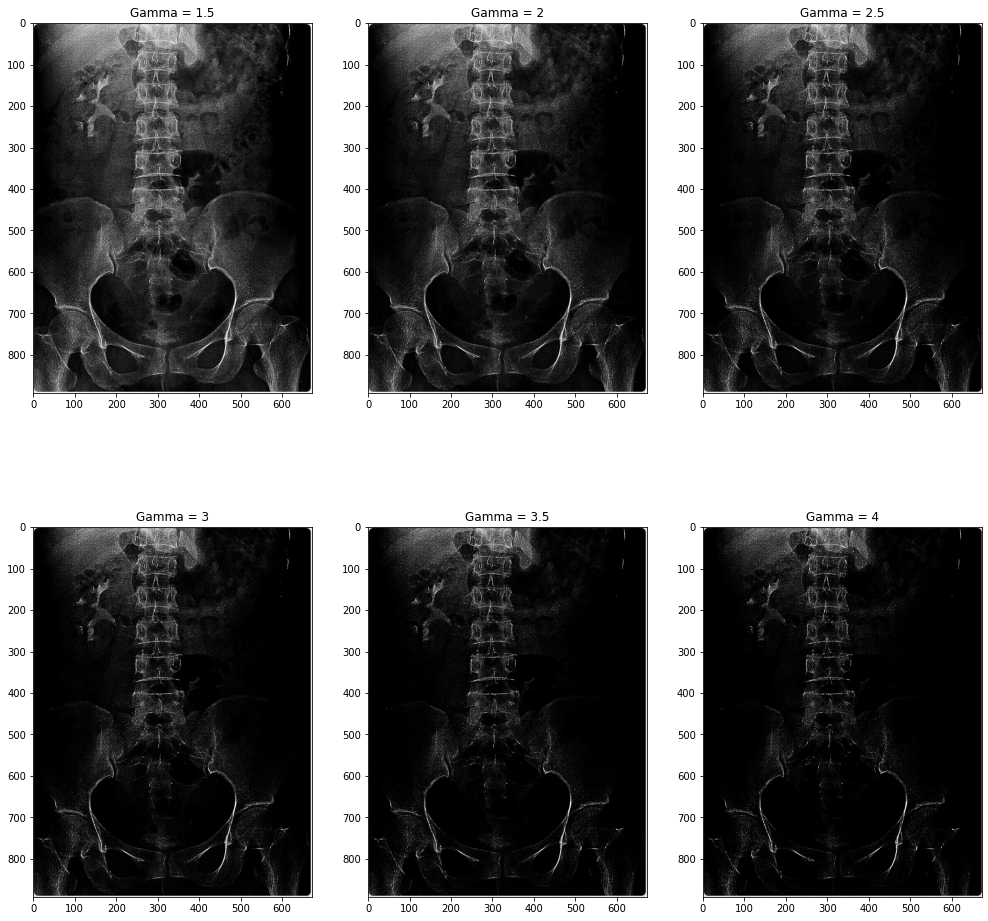

In [ ]:
powers = [1.5,2,2.5,3,3.5,4,4.5]
output = []
for i in powers:
  power_law = np.array(255*(sharper_img/255) ** i, dtype = 'uint8')
  output.append (power_law)

plt.figure (figsize=(17,17))
plt.subplot (2,3,1)
plt.imshow (output[0],cmap='gray')
plt.title (f"Gamma = {powers[0]}")
plt.subplot (2,3,2)
plt.imshow (output[1],cmap='gray')
plt.title (f"Gamma = {powers[1]}")
plt.subplot (2,3,3)
plt.imshow (output[2],cmap='gray')
plt.title (f"Gamma = {powers[2]}")
plt.subplot (2,3,4)
plt.imshow (output[3],cmap='gray')
plt.title (f"Gamma = {powers[3]}")
plt.subplot (2,3,5)
plt.imshow (output[4],cmap='gray')
plt.title (f"Gamma = {powers[4]}")
plt.subplot (2,3,6)
plt.imshow (output[5],cmap='gray')
plt.title (f"Gamma = {powers[5]}")

Text(0.5, 1.0, 'Final Enhanced Image')

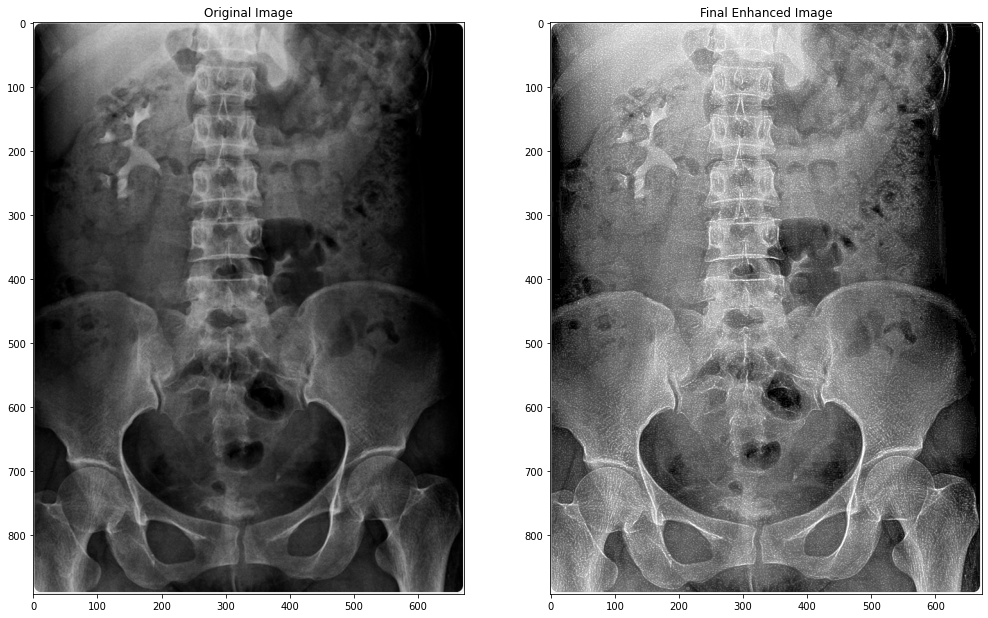

In [ ]:
i=0.6
final_img = np.array(255*(sharper_img/255) ** i, dtype = 'uint8')

plt.figure (figsize=(17,17))
plt.subplot (1,2,1)
plt.imshow (image_ori,cmap='gray')
plt.title ("Original Image")
plt.subplot (1,2,2)
plt.imshow (final_img,cmap='gray')
plt.title ("Final Enhanced Image")

CONCLUSIONS:

Digital imaging such as x-ray, MRI, CT etc. help to diagnose,
treat and cure patients. Doctors can see inside a patient’s
body by the virtue of medical imaging. Internal anatomy as
well as functionality of body parts can be identified easily.

In many under developed countries,
due to socioeconomic condition developed biomedical devices
are not available yet. Doctors & researchers face problems
due to low intensity & low contrast of the medical images.
The technique presented in this research to process medical
images should work very well in various environment